In [0]:
# https://reurl.cc/3QAyL 
from keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [0]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


什麼數字: 9


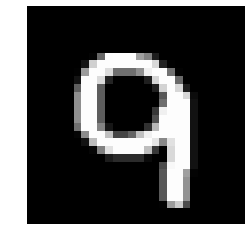

In [0]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, x_train.shape[0] - 1)
print("什麼數字:", y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [0]:
# https://reurl.cc/3QAyL 
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,4,104,254,255,254,254,160,130,29,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,20,208,253,253,253,253,253,253,253,216,34,2,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,2,156,253,253,220,111,111,111,144,240,253,253,114,3,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,19,253,253,219,36,0,0,0,0,31,213,253,253,104,0,0,0,0,0,0,0,0


In [0]:
# 資料預處理：題目 (0~1 -1~1)
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

In [0]:
# 資料預處理: 答案 (One-Hot Encoding)
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# https://reurl.cc/3QAyL 
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(128, activation="relu", input_dim=784))
# 128(input) * 10(output) + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 確定一下訓練方式
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [0]:
# https://reurl.cc/3QAyL 
mlp.fit(x_train_shape, y_train_cat,
        batch_size=200, epochs=15,
        verbose=2, validation_split=0.1)

In [0]:
mlp.evaluate(x_test_shape, y_test_cat)

In [0]:
from sklearn.metrics import confusion_matrix
pre = mlp.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre))

In [0]:
# https://reurl.cc/3QAyL 
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_ori_label = y_test[idx]
false_pre_label = pre[idx]

# subplot(h, w, idx)
w = 10
h = len(false_img) // w + 1
plt.figure(figsize=(14, 40))
for i, img in enumerate(false_img):
    plt.subplot(h, w, i + 1)
    t = "[O]:" + str(false_ori_label[i]) + "[P]:" + str(false_pre_label[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [0]:
# https://support.hdfgroup.org/products/java/release/download.html
from google.colab import files
mlp.save("mlp.h5")
files.download("mlp.h5")

In [0]:
from keras.models import load_model
loaded = load_model("mlp.h5")
loaded.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 1s 52us/step


[0.07734327795945574, 0.9763]